# Data Science Mathematics
# Statistical Inference
# In-Class Activity

###a) What is your null hypothesis? Explain what rejection of the null hypothesis means in terms of statistical inference.

The null hypothesis, in general, states that there is no relationship between two sets of data given a certain parameter (alpha) - it is a measure of statistical significance. If the null hypothesis is rejected, then it means that a relationship between the data sets exists within the given parameter (which represents a degree of certainty about the relationship) - in other words, the relationship is statistically significant. 

Our null hypothesis in this case states that there is no relationship between the date of the Russian election on 18 March 2018 and the similarity metric associated with Twitter activity.

###b) Are you able to detect an anomalous event on 18 March 2018, given the above data set, and assuming a type I error rate of 5%? Explain why or why not?

Yes, an anomalous event is likely to have occurred on 18 March 2018. As shown in the separately sent Excel file, calculation of the 95% confidence interval, using the applicable z value and sample's standard deviation and mean, produces a range of similarity metrics from 0.0387 to 0.1128. 

The value for the similarity metric on 18 March 2018 was 0.8965, which significantly exceeds the positive bound of the 95% confidence interval, indicating a very unlikely event in the extreme tail of the <2.5% probability range (and which is a nearly six sigma deviation from the mean, which encompasses well over 99% of the probable data points, at least when viewed as a standard distribution).

###c) Find the p-value using Python (see Python notebook for this exercise). Do you reject your hypothesis based on the calculated p-value?

Let's calculate a p-value for our data set.  First, let's import the relevant libraries.

In [39]:
import pandas as pd
import numpy as np
from scipy import stats

ModuleNotFoundError: No module named 'plotly'

Now, let's import our data set.  You need to specify the absolute path of the data set (Dataset_Session5.csv).

In [29]:
dataset = r'Dataset_Session5.csv' #Specify absolute path here.
data = pd.read_csv(dataset)

Now, let's get the data we want in the correct format: a Numpy array.

In [30]:
data_series = np.array(list(data['Similarity Metric (0.00-1.00)']))

Now we can calculate some descriptive statistics.

In [31]:
#mean and standard deviation
m = np.average(data_series)
sd = np.std(data_series,ddof=1)

Now print the values in the cell below:

In [32]:
print (m, sd)

0.07577999999999999 0.14641415232142008


At first glance, does it look like our value on 18 March 2018 is much different from the mean?

We know that on 18 March 2018, our value is 0.8965.  We are performing a one-sample t-test in this case to see if our value at that date is anomalous.  We will take that sample to be the "population mean," in this case. 

In [33]:
pop_mean = 0.8965

So let's calculate our t statistic and our two-tailed p-value.

In [34]:
t, p = stats.ttest_1samp(data_series, pop_mean, axis=0)

Now let's print our results.

In [35]:
print('t statistic: {}'.format(t))
print('p-value: {}'.format(p))

t statistic: -43.41977659265283
p-value: 1.749492641970814e-46


###Do we reject the null hypothesis?

Yes, we reject the null hypothesis because the p-value is *significantly* less than the confidence level, which we said was 5% or 0.05

###d) Calculate by hand again assuminge a type I error rate of 1%. What happens to the critical value of t? Intuitively, why is this the case? Does this change impact your conclusion?

The t statistic doesn't change, which makes sense, because it is supposed to be independent of the parameters around the population. 

Changing the error rate will impact how we assess the p-value, but, in this case, it is still significantly smaller than the error rate, so it does not impact our conclusion and we reject the null hypothesis, which was that there would be no anomalies during the Russian election. Our data show that an anomaly did, in fact, occur.

**This also makes sense when shown visually:**

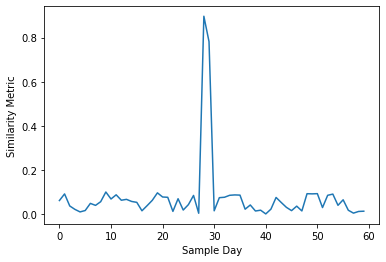

In [43]:
import matplotlib.pyplot as plt
plt.plot(data_series)
plt.ylabel('Similarity Metric')
plt.xlabel('Sample Day')
plt.show()

We can see clearly in the chart that sample days around day 30 appear to be major anomalies - going back to the data, we see that those days correlate to 18 March and 19 March 2018, days 29 and 30, respectively.

***Now save your output.  Go to File -> Print Preview and save your final output as a PDF.  Turn in to your Instructor, along with any additional sheets.